In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('location.csv')

In [3]:
data

,Unnamed: 0,Date,HS Code,Product,Specific Product,Port of Origin,Country of Destination,Port of Destination,Value(USD),Std Qty,...,Unit,Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Invoice Value INR,coordinates,Latitude,Longitude
0,0,31-Jan-20,42022110,LADIES LEATHER HAND BAG 100% COW LEATHER SAC C...,Leather,JNPT,France,Le Havre,1543.70,86.0,...,PCS,1543.7,17.95,USD,107981.82,Sea,0.0,"Le Havre, Seine-Maritime, Normandie",49.493590,0.100970
1,1,31-Jan-20,42022110,BAG,Leather,JNPT,Japan,Kobe,3074.75,710.0,...,PCS,3074.3,4.33,USD,215078.96,Sea,0.0,"Kobe, Hyogo",34.689416,135.195744
2,2,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2167,Leather,JNPT,Spain,Algeciras,2487.49,100.0,...,PCS,2365.0,23.65,EUR,174000.00,Sea,0.0,"Algeciras, Cádiz, Andalucía",36.127570,-5.452860
3,3,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2213,Leather,JNPT,Spain,Algeciras,1529.66,100.0,...,PCS,1450.0,14.50,EUR,107000.00,Sea,0.0,"Algeciras, Cádiz, Andalucía",36.127570,-5.452860
4,4,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.1132,Leather,JNPT,Spain,Algeciras,2558.97,70.0,...,PCS,2436.0,34.80,EUR,179000.00,Sea,0.0,"Algeciras, Cádiz, Andalucía",36.127570,-5.452860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4968,24-Oct-19,42022220,COTTON CLUTCH BAGS(80% COTTON 10% GLASS BEAD 1...,Cotton,JNPT,Mauritius,Louis,117.00,18.0,...,PCS,117.0,6.50,USD,8260.21,Sea,0.0,"Louis, Estuaire",0.416670,9.433330
4967,4969,24-Oct-19,42022220,COTTON CLUTCH BAGS(80% COTTON 10% GLASS BEAD 1...,Cotton,JNPT,Mauritius,Louis,78.00,12.0,...,PCS,114.0,9.50,USD,5506.82,Sea,0.0,"Louis, Estuaire",0.416670,9.433330
4968,4970,24-Oct-19,42022220,COTTON TABLET BAGS(80%COTTON 10%ACCORD 1 0%GLA...,Cotton,JNPT,Mauritius,Louis,90.00,12.0,...,PCS,114.0,9.50,USD,6354.00,Sea,0.0,"Louis, Estuaire",0.416670,9.433330
4969,4971,24-Oct-19,42022220,100% COTTON P/L BLOCK PRINTED BAG,Cotton,JNPT,Denmark,Aarhus,8792.80,3032.0,...,PCS,8792.8,2.90,USD,620771.84,Sea,0.0,"Aarhus, Midtjylland",56.153020,10.204860


In [4]:
df_filtered = data.copy()

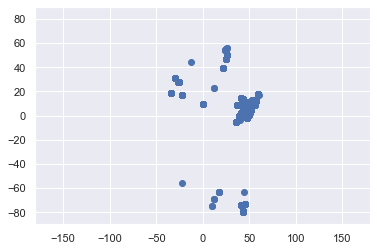

In [5]:
plt.scatter(data['Latitude'],data['Longitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [6]:
currency = df_filtered["Unit Rate Currency"].unique()
currency = currency.tolist()
df_filtered['Unit Rate Currency'] = df_filtered['Unit Rate Currency'].map(lambda x: currency.index(x))

spProd = df_filtered["Specific Product"].unique()
spProd = spProd.tolist()
df_filtered['Specific Product'] = df_filtered['Specific Product'].map(lambda x: spProd.index(x))

# df_filtered['Qty'] = df_filtered['Qty'].map(lambda x: 0 if x <100 else 1)
shipment = df_filtered["Shipment Mode"].unique()
shipment = shipment.tolist()
df_filtered['Shipment Mode'] = df_filtered['Shipment Mode'].map(lambda x: shipment.index(x))

prod = df_filtered["Product"].unique()
prod = prod.tolist()
df_filtered['Product'] = df_filtered['Product'].map(lambda x: prod.index(x))

pof = df_filtered["Port of Origin"].unique()
pof = pof.tolist()
df_filtered['Port of Origin'] = df_filtered['Port of Origin'].map(lambda x: pof.index(x))

cod = df_filtered["Country of Destination"].unique()
cod = cod.tolist()
df_filtered['Country of Destination'] = df_filtered['Country of Destination'].map(lambda x: cod.index(x))

pod = df_filtered["Port of Destination"].unique()
pod = pod.tolist()
df_filtered['Port of Destination'] = df_filtered['Port of Destination'].map(lambda x: pod.index(x))

df_filtered

,Unnamed: 0,Date,HS Code,Product,Specific Product,Port of Origin,Country of Destination,Port of Destination,Value(USD),Std Qty,...,Unit,Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Invoice Value INR,coordinates,Latitude,Longitude
0,0,31-Jan-20,42022110,0,0,0,0,0,1543.70,86.0,...,PCS,1543.7,17.95,0,107981.82,0,0.0,"Le Havre, Seine-Maritime, Normandie",49.493590,0.100970
1,1,31-Jan-20,42022110,1,0,0,1,1,3074.75,710.0,...,PCS,3074.3,4.33,0,215078.96,0,0.0,"Kobe, Hyogo",34.689416,135.195744
2,2,28-Jan-20,42022110,2,0,0,2,2,2487.49,100.0,...,PCS,2365.0,23.65,1,174000.00,0,0.0,"Algeciras, Cádiz, Andalucía",36.127570,-5.452860
3,3,28-Jan-20,42022110,3,0,0,2,2,1529.66,100.0,...,PCS,1450.0,14.50,1,107000.00,0,0.0,"Algeciras, Cádiz, Andalucía",36.127570,-5.452860
4,4,28-Jan-20,42022110,4,0,0,2,2,2558.97,70.0,...,PCS,2436.0,34.80,1,179000.00,0,0.0,"Algeciras, Cádiz, Andalucía",36.127570,-5.452860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4968,24-Oct-19,42022220,3809,5,0,13,23,117.00,18.0,...,PCS,117.0,6.50,0,8260.21,0,0.0,"Louis, Estuaire",0.416670,9.433330
4967,4969,24-Oct-19,42022220,3810,5,0,13,23,78.00,12.0,...,PCS,114.0,9.50,0,5506.82,0,0.0,"Louis, Estuaire",0.416670,9.433330
4968,4970,24-Oct-19,42022220,3811,5,0,13,23,90.00,12.0,...,PCS,114.0,9.50,0,6354.00,0,0.0,"Louis, Estuaire",0.416670,9.433330
4969,4971,24-Oct-19,42022220,3812,5,0,5,5,8792.80,3032.0,...,PCS,8792.8,2.90,0,620771.84,0,0.0,"Aarhus, Midtjylland",56.153020,10.204860


In [10]:
print(f'currency = {currency}\n\n Specific Product = {spProd}\n\n shipment = {shipment}\n\n Port of Origin = {pof} \n\n Country of Destination={cod}\n\n Port of Destination={pod}\n\n Product = {prod}')

currency = ['USD', 'EUR', 'CAD', 'INR', 'NZD', 'AUD', 'GBP', 'SEK', 'AED']

 Specific Product = ['Leather', 'Nylon', 'PU', 'Others', 'Polyester', 'Cotton']

 shipment = ['Sea', 'Air']

 Port of Origin = ['JNPT', 'Bombay Air', 'Mulund CFS'] 

 Country of Destination=['France', 'Japan', 'Spain', 'Germany', 'Netherlands', 'Denmark', 'Belgium', 'Italy', 'United Arab Emirates', 'New Zealand', 'Sweden', 'Australia', 'Canada', 'Mauritius', 'South Africa', 'Saudi Arabia']

 Port of Destination=['Le Havre', 'Kobe', 'Algeciras', 'Hamburg', 'Rotterdam', 'Aarhus', 'Antwerpen', 'Barcelona', 'La Spezia', 'Dubai', 'Kobenhavn', 'Auckland', 'Gothenburg', 'Nantes', 'Montoir de Bretagne', 'Melbourne', 'Valencia', 'Stockholm', 'AMSTERDAM SCHIPHOL', 'Ancona', 'Brampton', 'Dusseldorf', 'Vancouver', 'Louis', 'Tokyo', 'Na', 'Copenhagen', 'Durban', 'Sydeny', 'Jebel Ali', 'Frankfurt', 'Montreal', 'Paris', 'Lyon', 'Hakata', 'Fos sur Mer', 'Amsterdam', 'Napoli', 'Johannesburg', 'Dammam', 'Cape Town', 'Riyadh', 'B

In [15]:
df_filtered['Profit'] = df_filtered['Value(INR)']-(df_filtered['Qty']*df_filtered['Value(USD)'])

In [16]:
# df_filtered['Profit'] = df_filtered['Profit'].map(lambda x: 0 if x <100 else 1)

In [40]:

x = df_filtered.iloc[:,21:23]
# x = x.drop(['Unit',"Value In FC","Unit Rate In FC","Unit Rate Currency"],axis=1)
x

,Latitude,Longitude
0,49.493590,0.100970
1,34.689416,135.195744
2,36.127570,-5.452860
3,36.127570,-5.452860
4,36.127570,-5.452860
...,...,...
4966,0.416670,9.433330
4967,0.416670,9.433330
4968,0.416670,9.433330
4969,56.153020,10.204860


In [28]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np

In [18]:
# x["Specific Product"] = df_filtered["Specific Product"]
# x = x.drop(['Unit'],axis=1)
# x

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(5)
kmeans.fit(x.astype(np.float32))

KMeans(n_clusters=5)

In [20]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 4, 0, ..., 3, 0, 3])

In [21]:
data_with_clusters = df_filtered.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Unnamed: 0,Date,HS Code,Product,Specific Product,Port of Origin,Country of Destination,Port of Destination,Value(USD),Std Qty,...,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Invoice Value INR,coordinates,Latitude,Longitude,Profit,Cluster
0,0,31-Jan-20,42022110,0,0,0,0,0,1543.70,86.0,...,17.95,0,107981.82,0,0.0,"Le Havre, Seine-Maritime, Normandie",49.493590,0.100970,-24776.38,0
1,1,31-Jan-20,42022110,1,0,0,1,1,3074.75,710.0,...,4.33,0,215078.96,0,0.0,"Kobe, Hyogo",34.689416,135.195744,-1967993.54,4
2,2,28-Jan-20,42022110,2,0,0,2,2,2487.49,100.0,...,23.65,1,174000.00,0,0.0,"Algeciras, Cádiz, Andalucía",36.127570,-5.452860,-74749.00,0
3,3,28-Jan-20,42022110,3,0,0,2,2,1529.66,100.0,...,14.50,1,107000.00,0,0.0,"Algeciras, Cádiz, Andalucía",36.127570,-5.452860,-45966.00,0
4,4,28-Jan-20,42022110,4,0,0,2,2,2558.97,70.0,...,34.80,1,179000.00,0,0.0,"Algeciras, Cádiz, Andalucía",36.127570,-5.452860,-127.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4968,24-Oct-19,42022220,3809,5,0,13,23,117.00,18.0,...,6.50,0,8260.21,0,0.0,"Louis, Estuaire",0.416670,9.433330,6154.21,3
4967,4969,24-Oct-19,42022220,3810,5,0,13,23,78.00,12.0,...,9.50,0,5506.82,0,0.0,"Louis, Estuaire",0.416670,9.433330,4570.82,3
4968,4970,24-Oct-19,42022220,3811,5,0,13,23,90.00,12.0,...,9.50,0,6354.00,0,0.0,"Louis, Estuaire",0.416670,9.433330,5274.00,3
4969,4971,24-Oct-19,42022220,3812,5,0,5,5,8792.80,3032.0,...,2.90,0,620771.84,0,0.0,"Aarhus, Midtjylland",56.153020,10.204860,-26038997.76,0


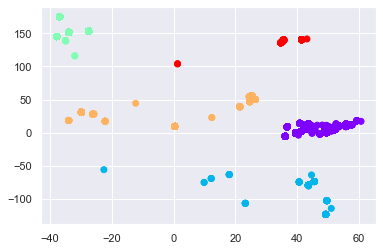

In [23]:
plt.scatter(data_with_clusters['Latitude'],data_with_clusters['Longitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
# plt.xlim(-180,180)
# plt.ylim(-90,90)
plt.show()

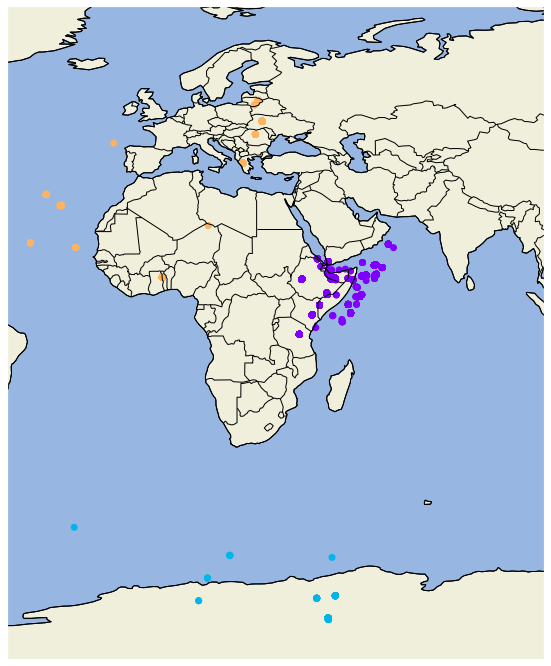

In [65]:
data_crs = ccrs.PlateCarree()
roads = cfeature.NaturalEarthFeature(category='cultural',
                                         name='roads',
                                        scale='10m',
                                         facecolor='none'),
# The projection keyword determines how the plot will look
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([100,-40,-100,80],ccrs.PlateCarree())
ax.scatter(data_with_clusters['Latitude'],data_with_clusters['Longitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
# for i in X
# Save the plot by calling plt.savefig() BEFORE plt.show()
# plt.savefig('coastlines.pdf')
# plt.savefig('coastlines.png')

# plt.show()

In [66]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[16879174.532695096,
 4424413.1189700365,
 2192257.0769245015,
 1205942.8140745717,
 753550.7089804971,
 477236.0808689499,
 357598.1079504208,
 293278.44719317404,
 224065.13949370699]

Text(0, 0.5, 'Within-cluster Sum of Squares')

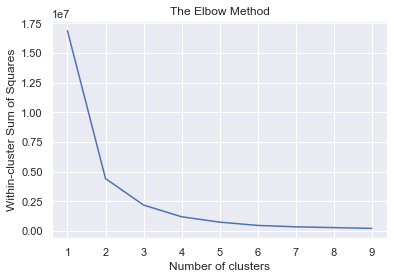

In [67]:
number_cluster = range(1,10)
plt.plot(number_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')